# Regressão Softmax com dados do MNIST utilizando gradiente descendente estocástico por minibatches

O objetivo deste notebook é ilustrar
- o uso do gradiente estocástico por mini-batchs
- utilizando as classes Dataset e DataLoater.

A apresentação da perda nos gráficos é um pouco diferente da usual, mostrando a perda de cada um dos vários minibatches dentro de cada época, de forma que as épocas são apresentadas com valores fracionários.

## Importação das bibliotecas

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.autograd import Variable
from torch.utils.data import DataLoader

import torchvision
from torchvision.datasets import MNIST

## Dataset e dataloader

### Definição do tamanho do minibatch

In [2]:
batch_size = 400

### Carregamento, criação dataset e do dataloader

In [3]:
dataset_dir = 'MNIST/'

dataset_train = MNIST(dataset_dir, train=True, download=True,
                      transform=torchvision.transforms.ToTensor())

loader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)

print('Número de minibatches de trenamento:', len(loader_train))

x_train, y_train = next(iter(loader_train))
print("\nDimensões dos dados de um minibatch:", x_train.size())
print("Valores mínimo e máximo dos pixels: ", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:         ", type(x_train))
print("Tipo das classes das imagens:       ", type(y_train))

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting MNIST/MNIST\raw\train-images-idx3-ubyte.gz to MNIST/MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting MNIST/MNIST\raw\train-labels-idx1-ubyte.gz to MNIST/MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting MNIST/MNIST\raw\t10k-images-idx3-ubyte.gz to MNIST/MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting MNIST/MNIST\raw\t10k-labels-idx1-ubyte.gz to MNIST/MNIST\raw

Número de minibatches de trenamento: 150

Dimensões dos dados de um minibatch: torch.Size([400, 1, 28, 28])
Valores mínimo e máximo dos pixels:  tensor(0.) tensor(1.)
Tipo dos dados das imagens:          <class 'torch.Tensor'>
Tipo das classes das imagens:        <class 'torch.Tensor'>


### Usando todas as amostras do MNIST

Neste exemplo utilizaremos todas as amostras de treinamento.

In [4]:
print('Número de minibatches de trenamento:', len(loader_train))
n_batches_train = len(loader_train)
total_samples = dataset_train.train_data.size(0)

Número de minibatches de trenamento: 150


c:\Users\fabio\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\datasets\mnist.py:76: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


## Modelo

In [5]:
model = torch.nn.Linear(28*28, 10)

In [6]:
x = torch.ones(28*28).reshape(1, 784)
print(x.shape)
predict = model(x)
predict

torch.Size([1, 784])


tensor([[ 0.3962,  0.2001,  0.3027, -0.0811,  0.0931, -0.2778,  1.2653,  0.0771,
          0.6856, -0.6796]], grad_fn=<AddmmBackward0>)

## Treinamento

### Inicialização dos parâmetros

In [7]:
n_epochs = 5
learningRate = 0.5

# Utilizaremos CrossEntropyLoss como função de perda
criterion = torch.nn.CrossEntropyLoss()

# Gradiente descendente
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

### Laço de treinamento dos parâmetros

In [8]:
epochs = []
losses = []

total_trained_samples = 0
for i in range(n_epochs):
    for k,(x_train, y_train) in enumerate(loader_train):
        # Transforma a entrada para uma dimensão
        inputs = Variable(x_train.view(-1, 28 * 28))
        # predict da rede
        outputs = model(inputs)

        # calcula a perda
        loss = criterion(outputs, Variable(y_train))

        # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_trained_samples += x_train.size(0)
        epochs.append(total_trained_samples / total_samples)
        losses.append(loss.data)

        print(f'Época: {i+1}:{n_epochs}, batch: {k+1}/{len(loader_train)}')

Época: 1:5, batch: 1/150
Época: 1:5, batch: 2/150
Época: 1:5, batch: 3/150
Época: 1:5, batch: 4/150
Época: 1:5, batch: 5/150
Época: 1:5, batch: 6/150
Época: 1:5, batch: 7/150
Época: 1:5, batch: 8/150
Época: 1:5, batch: 9/150
Época: 1:5, batch: 10/150
Época: 1:5, batch: 11/150
Época: 1:5, batch: 12/150
Época: 1:5, batch: 13/150
Época: 1:5, batch: 14/150
Época: 1:5, batch: 15/150
Época: 1:5, batch: 16/150
Época: 1:5, batch: 17/150
Época: 1:5, batch: 18/150
Época: 1:5, batch: 19/150
Época: 1:5, batch: 20/150
Época: 1:5, batch: 21/150
Época: 1:5, batch: 22/150
Época: 1:5, batch: 23/150
Época: 1:5, batch: 24/150
Época: 1:5, batch: 25/150
Época: 1:5, batch: 26/150
Época: 1:5, batch: 27/150
Época: 1:5, batch: 28/150
Época: 1:5, batch: 29/150
Época: 1:5, batch: 30/150
Época: 1:5, batch: 31/150
Época: 1:5, batch: 32/150
Época: 1:5, batch: 33/150
Época: 1:5, batch: 34/150
Época: 1:5, batch: 35/150
Época: 1:5, batch: 36/150
Época: 1:5, batch: 37/150
Época: 1:5, batch: 38/150
Época: 1:5, batch: 39

In [9]:
print('Final loss:', loss.data)

Final loss: tensor(0.2633)


### Visualizando gráfico de perda durante o treinamento

Text(0.5, 0, 'época')

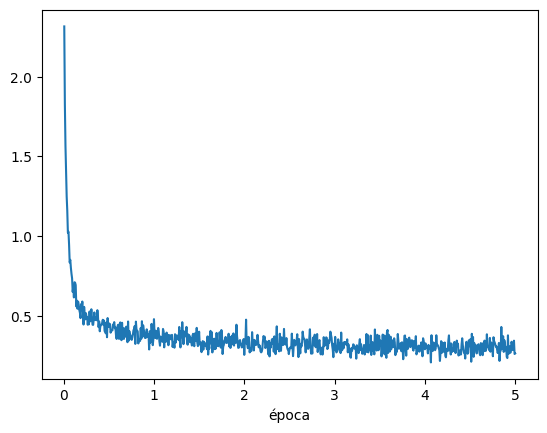

In [10]:
plt.plot(epochs, losses)
plt.xlabel('época')

### Visualização usual da perda, somente no final de cada minibatch

Text(0.5, 0, 'época')

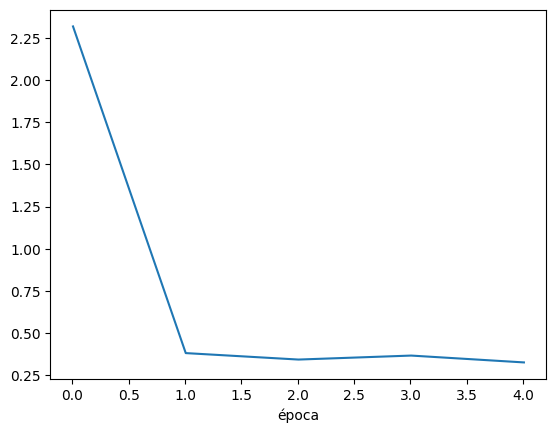

In [11]:
plt.plot(epochs[:5 * n_batches_train +1:n_batches_train], losses[:5 * n_batches_train+1:n_batches_train])
plt.xlabel('época')

# Atividades

## Perguntas

1. Qual é o tamanho do mini-batch?
> 100 amostras.

2. Em uma época, quantos mini-batches existem? 
> 100 em cada epoch.

3. Qual é a definição de época? 
> É a quantidade de iterações necessárias para o modelo percorrer meu dataset

## Exercícios


1. Coloque um print no final de cada minibatch, no mesmo estilo do print do final de época, no seguinte estilo:
    - Época: 1/4, batch: 600

2. Altere o tamanho de minibatch (batch_size) algumas vezes, refaça o treinamento, e compare no gráfico abaixo a queda da perda para cada tamanho de minibatch.

> Conforme eu aumento o tamanho dos minibatches, o modelo tende a apresentar um menor ruído e convergir para uma perda menor após dado número de epochs. QUanndo uso batch sizes muito pequenos, ele apresenta uma perda mais alta!

## Conclusões sobre os experimentos deste notebook
